# Brownian Motion

This notebook will go through the implementation of a particular stochastic process known as a Brownian motion, which comes from the concept of Markov Processes, specifically the continuous time model of a random walk.
\
For a theoretical understanding of Brownian Motion, please click the following link: ...

## Imports

In [1]:
# Import Libraries
from typing import List
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

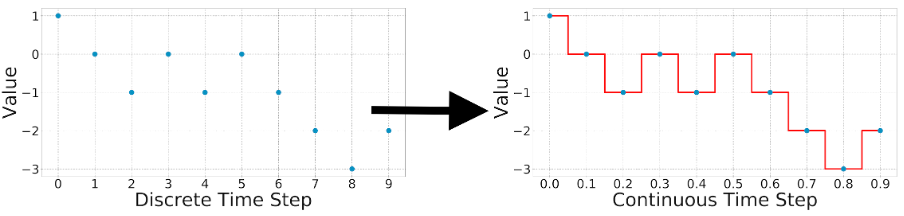

## Functions

In [2]:
def brownian_motion(prob: float, n: int, t: int, h: int, start_pos: 0 = int, derivation: "approximation" = str):
    # Time between each step
    dt = t / n
    # Step size
    increments = np.random.choice([-1, 1], size=n, p=[1-prob, prob], replace=True) if derivation == "approximation" else np.random.normal(0.0, 1.0 * h, n)
    # Scaled step sizes
    scaled_increments = increments * np.sqrt(dt)  
    # Return Brownian motion
    brownian_motion = np.cumsum(scaled_increments)
    return np.insert(brownian_motion, 0, 0.0)

In [3]:
def plot_brownian_motion(ax, n_list: int, t_list: int, h: int, observations: List[List], title: str):
    for realisation, t, n in zip(observations, t_list, n_list):
        ax.plot(np.linspace(0, t, n+1), realisation, label=n)
    ax.set_xlabel('Time')
    ax.set_ylabel('Path')
    ax.set_title(title)

## Results

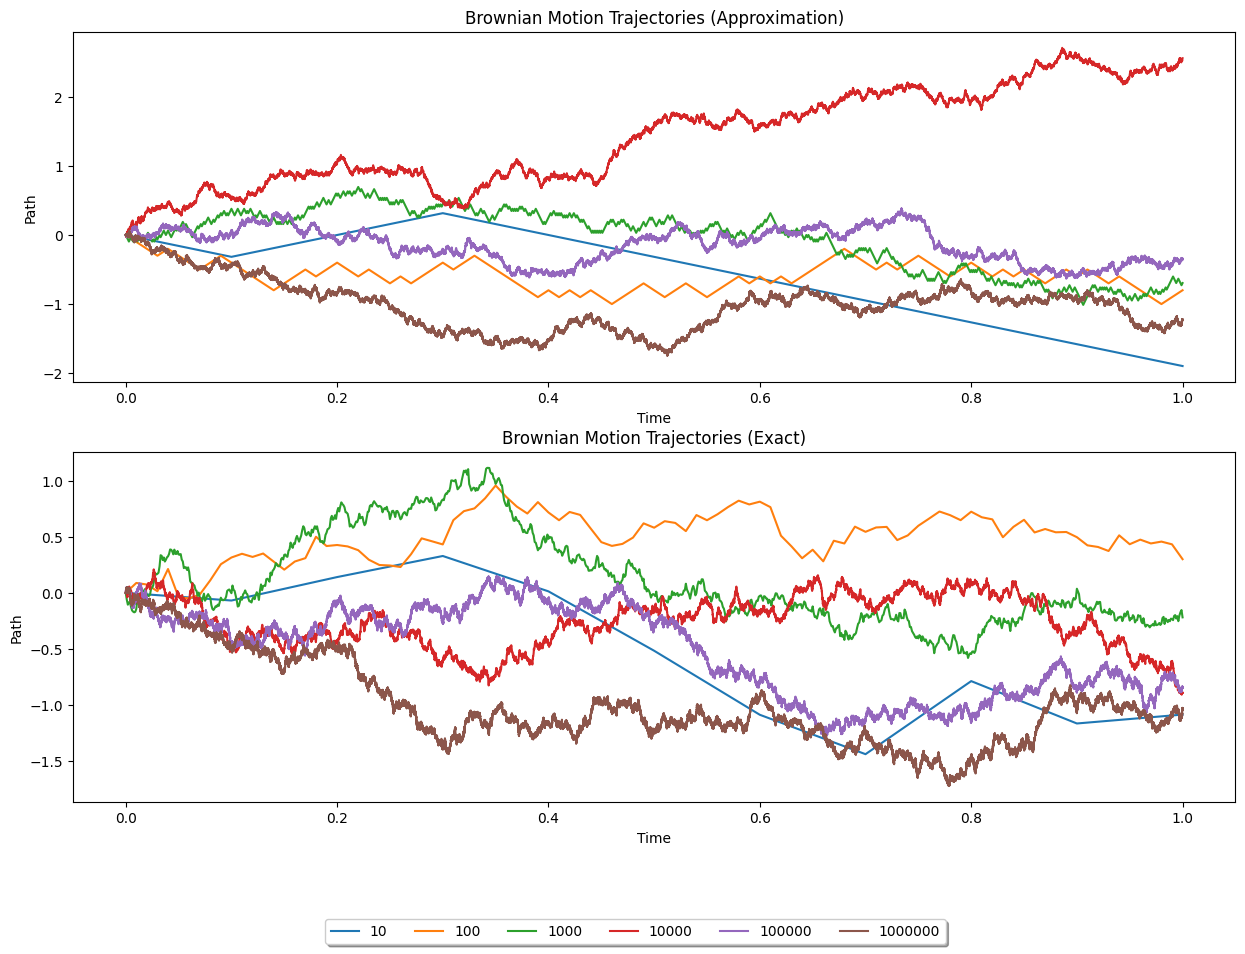

In [4]:
# Obtain multiple paths
n_list = [10**i for i in range(1, 7, 1)]
t_list = [1 for i in range(len(n_list))]
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
observation_list = [brownian_motion(prob=0.5, n=n_diff, t=1, h=1, start_pos=0, derivation="approximation") for n_diff in n_list]
plot_brownian_motion(ax=axs[0], n_list=n_list, t_list=t_list, h=1, observations=observation_list, title= "Brownian Motion Trajectories (Approximation)")
observation_list = [brownian_motion(prob=0.5, n=n_diff, t=1, h=1, start_pos=0, derivation="exact") for n_diff in n_list]
plot_brownian_motion(ax=axs[1], n_list=n_list, t_list=t_list, h=1, observations=observation_list, title= "Brownian Motion Trajectories (Exact)")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=6);

In [5]:
# Run Brownian Motion simulation
X_t_approx = brownian_motion(prob=0.5, n=1000000, t=1, h=1, start_pos=0, derivation="approximation")
# Calculate the mean of balance values
mean_X_t_approx = np.mean(X_t_approx)
# Calculate the variance of balance values`
variance_X_t_approx = np.var(X_t_approx)
# Calculate quadratic variation
quadratic_variance_X_t_approx = np.sum(np.square(np.diff(X_t_approx)))
# Print the results
print(rf"Mean: {np.round(mean_X_t_approx, 2)}")
print(rf"Variance: {np.round(variance_X_t_approx, 2)}")
print(rf"Quadratic variation: {np.round(quadratic_variance_X_t_approx, 2)}")

Mean: 0.44
Variance: 0.06
Quadratic variation: 1.0


In [6]:
# Run Brownian Motion simulation
X_t_exact = brownian_motion(prob=0.5, n=1000000, t=1, h=1, start_pos=0, derivation="exact")
# Calculate the mean of balance values
mean_X_t_exact = np.mean(X_t_exact)
# Calculate the variance of balance values`
variance_X_t_exact = np.var(X_t_exact)
# Calculate quadratic variation
quadratic_variance_X_t_exact = np.sum(np.square(np.diff(X_t_exact)))
# Print the results
print(rf"Mean: {np.round(mean_X_t_exact, 2)}")
print(rf"Variance: {np.round(variance_X_t_exact, 2)}")
print(rf"Quadratic variation: {np.round(quadratic_variance_X_t_exact, 2)}")

Mean: 0.24
Variance: 0.05
Quadratic variation: 1.0


We can see that in the limiting process i.e. as $N \rightarrow \infty$, the random walk stays finite and we define this as **Brownian Motion**. 
\
Our results so far suggest this but there is a slight deviation - this could be due to the randomness in the experiment. 
\
What we do next is show that Brownian Motion has Gaussian distribution properties through *approximation* and *exact* generations of a Brownian Motion path.

In [7]:
# Number of steps
n = 1000000
# Total time
t = 1.0
# Variance parameter
h = 1.0 
# Number of trials
num_trials = 5000

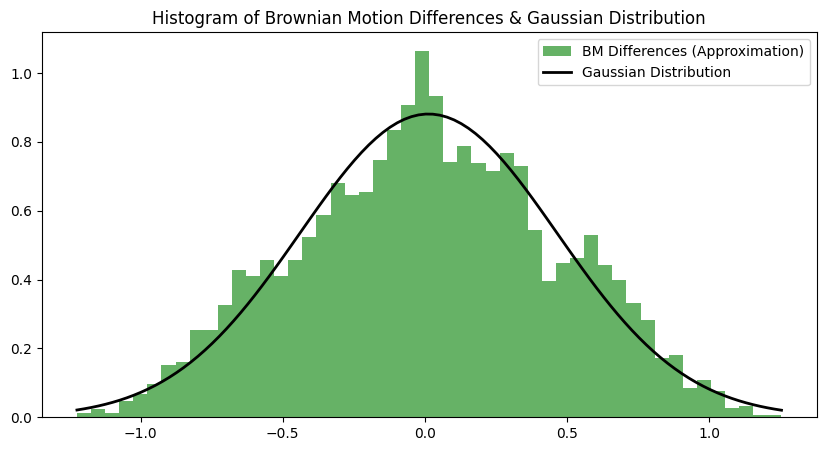

In [8]:
# Simulate Brownian motion
bm = brownian_motion(prob=0.5, n=n, t=t, h=h, derivation="approximation")
# Store differences
differences = []
# Find difference between two random points and store them
for _ in range(num_trials):
    i, j = np.random.choice(a=n, size=2, replace=False)
    differences.append(bm[j] - bm[i])
# Calculate mean and standard deviation of differences
mean_diff = np.mean(differences)
std_diff = np.std(differences)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot histogram
plt.hist(differences, bins=50, density=True, alpha=0.6, color='g', label="BM Differences (Approximation)")
# Plot Gaussian distribution
x = np.linspace(min(differences), max(differences), 100)
plt.plot(x, stats.norm.pdf(x, mean_diff, std_diff), 'k', linewidth=2, label="Gaussian Distribution")
plt.title("Histogram of Brownian Motion Differences & Gaussian Distribution")
plt.legend()
plt.show()

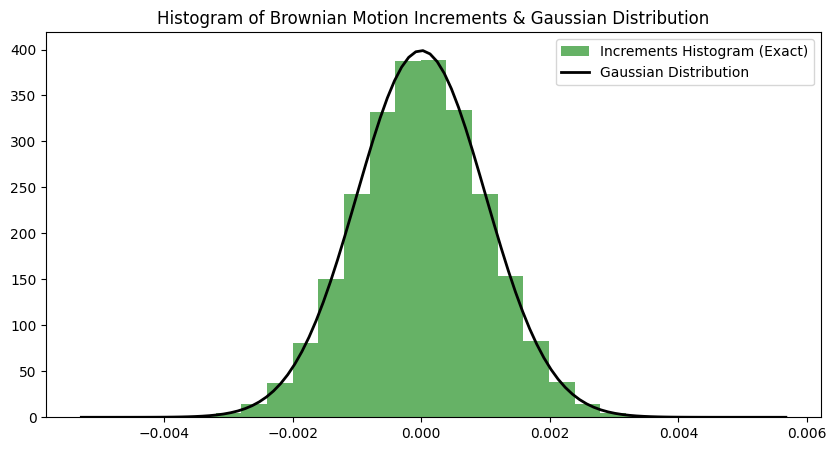

In [9]:
# Simulate Brownian motion
bm = brownian_motion(prob=0.5, n=n, t=t, h=h, derivation="exact")
# Let's extract the increments over a time interval, say dt
increments = np.diff(bm)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# Plot the histogram of increments
plt.hist(increments, bins=25, density=True, alpha=0.6, color='g', label="Increments Histogram (Exact)")
# Plot the Gaussian (normal) distribution for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, 0, np.sqrt(h * t / n)) 
plt.plot(x, p, 'k', linewidth=2, label="Gaussian Distribution")
plt.title("Histogram of Brownian Motion Increments & Gaussian Distribution")
plt.legend()
plt.show()

© PolyNath 2023